In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
data=pd.read_csv('C:/Users/BHAGYASHREE/Documents/python/shelter.csv',na_values=("??","????"))
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Lucy,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,partner,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Lucy,Rabies Risk,Euthanasia,Unknown


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age_upon_outcome  1999 non-null   object
 1   animal_id         1999 non-null   object
 2   animal_type       1999 non-null   object
 3   breed             1999 non-null   object
 4   color             1999 non-null   object
 5   date_of_birth     1999 non-null   object
 6   datetime          1999 non-null   object
 7   name              1999 non-null   object
 8   outcome_subtype   1999 non-null   object
 9   outcome_type      1999 non-null   object
 10  sex_upon_outcome  1999 non-null   object
dtypes: object(11)
memory usage: 171.9+ KB


In [19]:
data.describe()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
count,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999,1999
unique,41,1985,5,348,156,1175,1936,1030,15,7,5
top,1 year,A680834,Dog,Domestic Shorthair Mix,Black/White,2014-05-05T00:00:00,2014-05-22T19:17:00,Lucy,partner,Adoption,Neutered Male
freq,347,2,1121,587,212,8,3,704,983,762,679


In [20]:
data.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'name', 'outcome_subtype', 'outcome_type',
       'sex_upon_outcome'],
      dtype='object')

In [21]:
data.isnull().sum()

age_upon_outcome    0
animal_id           0
animal_type         0
breed               0
color               0
date_of_birth       0
datetime            0
name                0
outcome_subtype     0
outcome_type        0
sex_upon_outcome    0
dtype: int64

In [22]:
data.shape

(1999, 11)

In [23]:
#Converting categorical values to numerical data

data['animal_type'] = pd.get_dummies(data['animal_type'], dtype=int)[['Dog']]
data['breed'] = pd.factorize(data['breed'])[0] + 1 # Adding 1 to start from 1 instead of 0
data['outcome_subtype'] = pd.factorize(data['outcome_subtype'])[0] + 1
data['outcome_type'] = pd.factorize(data['outcome_type'])[0] + 1
data.head()

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,0,1,Orange Tabby,2014-07-07T00:00:00,2014-07-22T16:04:00,Lucy,1,1,Intact Male
1,1 year,A666430,1,2,White/Brown,2012-11-06T00:00:00,2013-11-07T11:47:00,Lucy,1,1,Spayed Female
2,1 year,A675708,1,3,Blue/White,2013-03-31T00:00:00,2014-06-03T14:20:00,*Johnny,2,2,Neutered Male
3,9 years,A680386,1,4,White,2005-06-02T00:00:00,2014-06-15T15:50:00,Monday,1,1,Neutered Male
4,5 months,A683115,0,5,Brown,2014-01-07T00:00:00,2014-07-07T14:04:00,Lucy,3,3,Unknown


[Text(0.5, 1.0, 'Lineplot')]

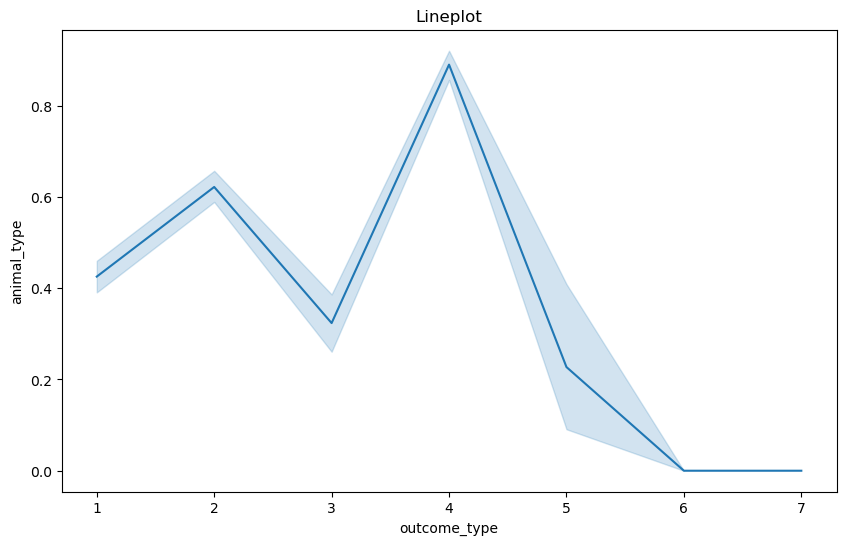

In [24]:
#regression plot

plt.figure(figsize=(10,6))
sns.lineplot(data=data, y="animal_type", x="outcome_type").set(title ="Lineplot")

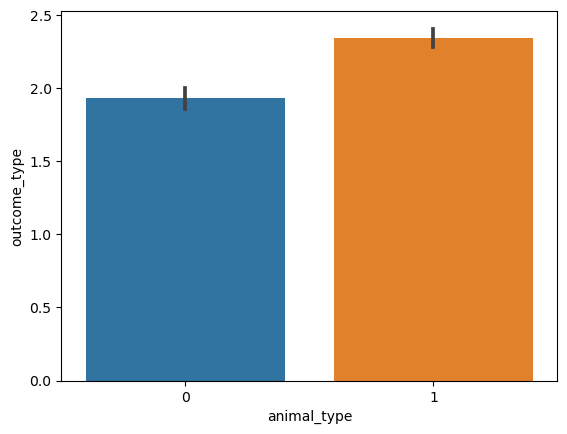

In [25]:
#barplot

sns.barplot(x='animal_type', y='outcome_type', data=data)
plt.show()

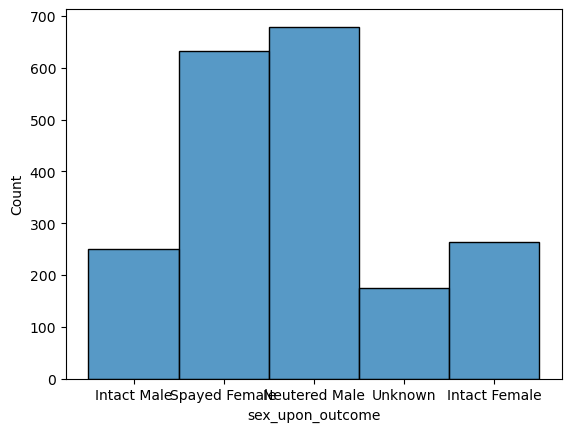

In [26]:
#histogram plot

sns.histplot(data=data['sex_upon_outcome'])
plt.show()

<Axes: >

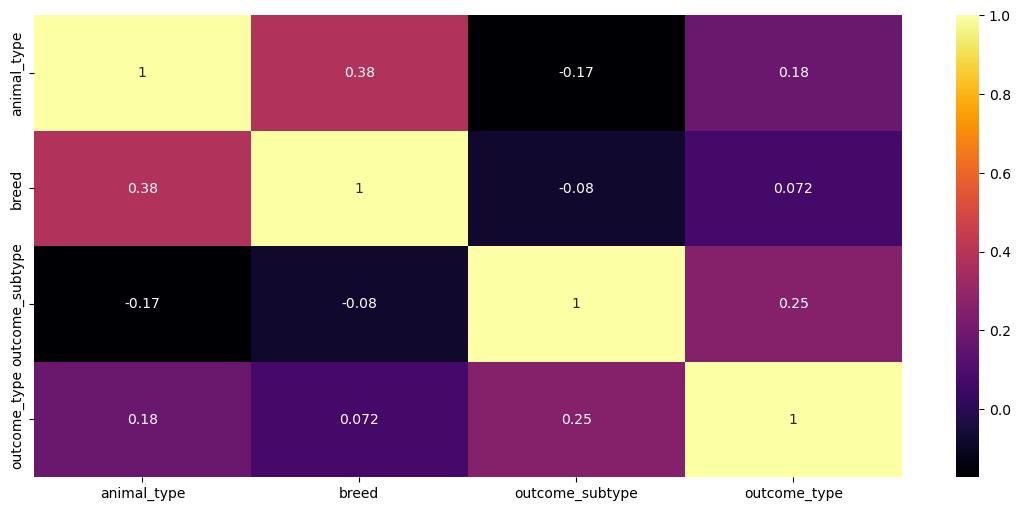

In [27]:
#Correlation

fig=plt.figure(figsize=(14,6))
sns.heatmap(data.corr(numeric_only=True),cmap="inferno",annot=True)

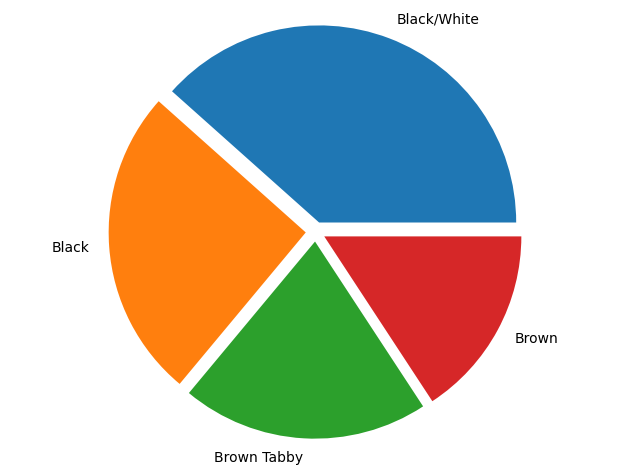

In [28]:
#pie chart

color = data['color'].value_counts().head(4)
explode = (0.05, 0.05, 0.05, 0.05) # explode 1st slice
# Plot
plt.pie(color.values, explode=explode, labels=color.index)
plt.axis('equal')
plt.tight_layout()
plt.show()

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Splitting dependent and independent data
x = data[['animal_type', 'breed', 'outcome_subtype']]
y = data['outcome_type'] 

# Encode categorical features
x_encoded = pd.get_dummies(x, columns=['animal_type', 'breed', 'outcome_subtype'])

# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=0)

# Build a Logistic Regression model
regressor = LogisticRegression(max_iter=1000) 
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

# Checking the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.83


In [30]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Classification Report
classification_rep = classification_report(y_test, y_pred, zero_division=1)

# Print the classification report
print("Logistic Regression Classification Report:\n", classification_rep)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00       210
           2       0.74      0.88      0.80       222
           3       0.94      0.94      0.94        72
           4       0.45      0.27      0.34        82
           5       1.00      0.20      0.33        10
           6       0.33      0.25      0.29         4

    accuracy                           0.83       600
   macro avg       0.74      0.59      0.62       600
weighted avg       0.82      0.83      0.81       600



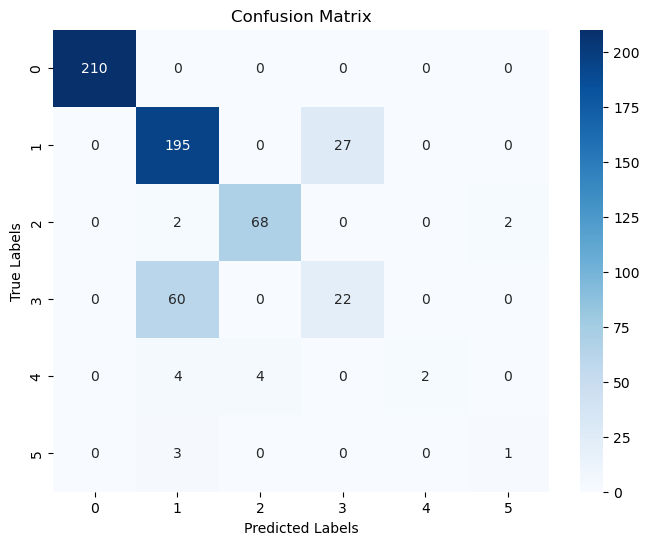

In [31]:
# Create a heatmap for the confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()